### Movie Rating Prediction 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
movie_rating=pd.read_csv("movie data.csv",encoding="latin1")
movie_rating

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,-1988.0,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,-2005.0,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,-1988.0,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
movie_rating.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [3]:
movie_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [4]:
movie_rating.dropna(subset=["Rating"],inplace=True)


In [5]:
movie_rating.dropna(subset=["Actor 1","Actor 2","Actor 3"],inplace=True)

In [6]:
movie_rating.dropna(subset=["Duration"],inplace=True)

In [7]:
movie_rating.dropna(subset=["Genre"],inplace=True)

In [8]:
movie_rating.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [89]:
movie_rating["Votes"]=movie_rating["Votes"].str.replace(",","").astype(int)

In [90]:
movie_rating["Year"]=movie_rating["Year"].astype(str).str.strip("{}").astype(float).astype(int)

In [10]:
movie_rating["Duration"]=movie_rating["Duration"].str.strip("min").astype(int)

In [11]:
movie_rating["Duration"].fillna(movie_rating["Duration"].median(),inplace=True)

C:\Users\rajas\AppData\Local\Temp\ipykernel_10276\1906905201.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movie_rating["Duration"].fillna(movie_rating["Duration"].median(),inplace=True)


In [12]:
movie_rating.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   float64
 2   Duration  5659 non-null   int64  
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 486.3+ KB


In [13]:
top_movie = movie_rating.sort_values(by="Rating",ascending=False).head(10)
top_movie

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,-2020.0,94,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
5410,Half Songs,-2021.0,79,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
6852,June,-2021.0,93,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
5077,Gho Gho Rani,-2019.0,105,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
14222,The Reluctant Crime,-2020.0,113,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
5125,God of gods,-2019.0,90,Documentary,9.3,46,Venkatesh Bk,Tejaswini Manogna,Triyug Mantri,Raj Singh Verma
8344,Love Sorries,-2021.0,101,"Comedy, Drama, Romance",9.3,79,Gautam Joshi,Prashant Chaubey,Puneet Chouksey,Amitabh Gupta
1314,Ashok Vatika,-2018.0,97,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
1729,Baikunth,-2021.0,72,Family,9.3,29,Vishwa Bhanu,Vishwa Bhanu,Sangam Shukla,Vijay Thakur
11843,Refl3ct,-2021.0,65,Sci-Fi,9.3,467,Nikhil Mahar,Vijay Mahar,Vijay Mahar,Nikhil Mahar


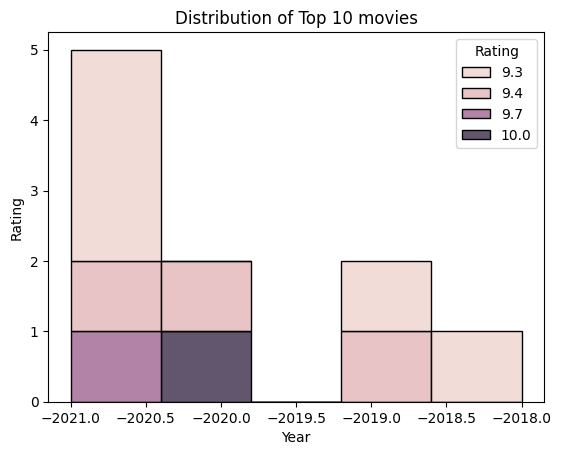

In [14]:
sns.histplot(data=top_movie,x="Year",hue="Rating",multiple="stack")
plt.title("Distribution of Top 10 movies")
plt.xlabel("Year")
plt.ylabel("Rating")
plt.show()

In [15]:
genre_counts = movie_rating["Genre"].value_counts().reset_index()
genre_counts.columns = ["Genre","Count"]

top_genre = genre_counts.head()
top_genre

,Genre,Count
0,Drama,844
1,"Drama, Romance",332
2,"Action, Crime, Drama",329
3,"Action, Drama",206
4,"Comedy, Drama",205


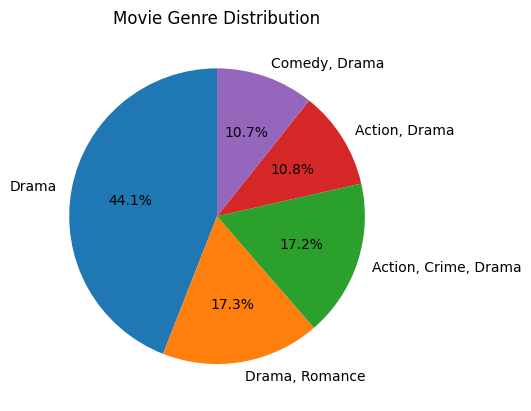

In [16]:
plt.pie(top_genre["Count"],labels=top_genre["Genre"],autopct="%1.1f%%",startangle=90)
plt.title("Movie Genre Distribution")
plt.show()

In [17]:
director_rating = movie_rating.groupby("Director")["Rating"].mean().reset_index()
director_rating = director_rating.sort_values(by="Rating",ascending=False)

top_directors = director_rating.head(10)
top_directors

,Director,Rating
1833,Saif Ali Sayeed,10.0
2107,Sriram Raja,9.7
1240,Munni Pankaj,9.4
2142,Suhrud Godbole,9.4
274,Arvind Pratap,9.4
1306,Nikhil Mahar,9.3
2387,Vishwa Bhanu,9.3
1921,Sapna Bhavnani,9.3
1515,Raghav Jairath,9.3
635,Gautam Joshi,9.3


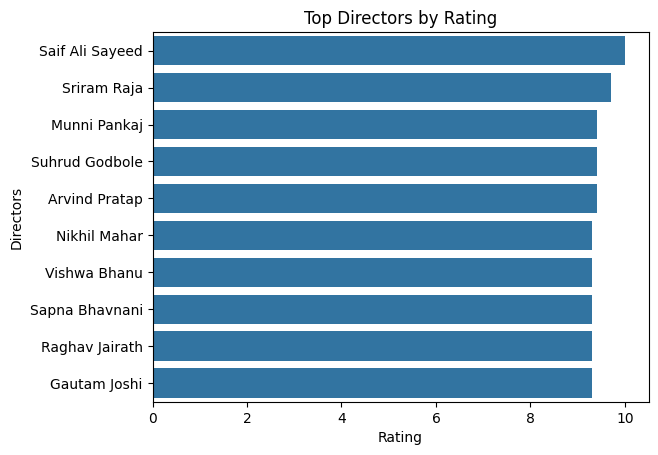

In [26]:
sns.barplot(data=top_directors,x="Rating",y="Director")
plt.title("Top Directors by Rating")
plt.xlabel("Rating")
plt.ylabel("Directors")
plt.show()

In [25]:
actor_movie_counts = movie_rating["Actor 1"].value_counts().reset_index()
actor_movie_counts.columns = ["Actor","Movie Count"]

top_movie_count = actor_movie_counts.head(10)
top_movie_count

,Actor,Movie Count
0,Amitabh Bachchan,104
1,Mithun Chakraborty,93
2,Ashok Kumar,91
3,Dharmendra,90
4,Jeetendra,89
5,Akshay Kumar,82
6,Shashi Kapoor,81
7,Rajesh Khanna,74
8,Ajay Devgn,70
9,Sanjay Dutt,61


In [27]:
yearly_movie_counts = movie_rating["Year"].value_counts().reset_index()
yearly_movie_counts.columns = ["Year","Movie Count"]

yearly_movie_counts = yearly_movie_counts.sort_values("Year")
yearly_movie_counts

,Year,Movie Count
39,-2021.0,63
9,-2020.0,140
0,-2019.0,227
2,-2018.0,202
1,-2017.0,211
...,...,...
83,-1935.0,5
87,-1934.0,2
89,-1933.0,1
90,-1932.0,1


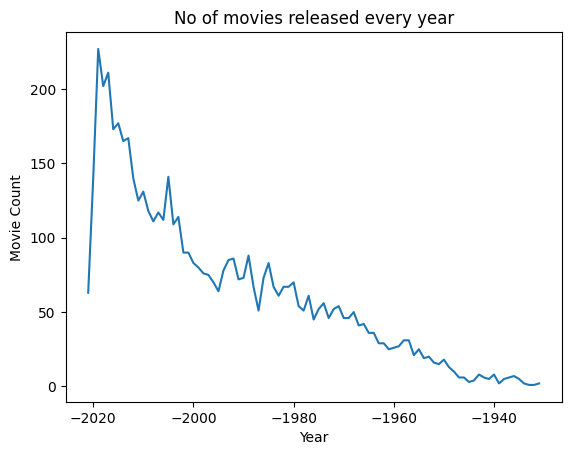

In [103]:
sns.lineplot(data=yearly_movie_counts,x="Year",y="Movie Count")
plt.title("No of movies released every year")
plt.show()

In [66]:
movie_rating["Votes"].sort_values().unique()

array([     5,      6,      7, ..., 220526, 357889, 591417], shape=(2027,))

In [67]:
movie_rating["Rating"].sort_values().unique()

array([ 1.1,  1.4,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,
        2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,
        3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,
        4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,  5.6,  5.7,
        5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,  6.7,  6.8,
        6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,  7.8,  7.9,
        8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,  8.9,  9. ,
        9.1,  9.2,  9.3,  9.4,  9.7, 10. ])

In [28]:
movie_rating.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   float64
 2   Duration  5659 non-null   int64  
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 486.3+ KB


In [73]:
movie_rating["Year"].sort_values().unique()

array([-2022., -2021., -2020., -2019., -2018., -2017., -2016., -2015.,
       -2014., -2013., -2012., -2011., -2010., -2009., -2008., -2007.,
       -2006., -2005., -2004., -2003., -2002., -2001., -2000., -1999.,
       -1998., -1997., -1996., -1995., -1994., -1993., -1992., -1991.,
       -1990., -1989., -1988., -1987., -1986., -1985., -1984., -1983.,
       -1982., -1981., -1980., -1979., -1978., -1977., -1976., -1975.,
       -1974., -1973., -1972., -1971., -1970., -1969., -1968., -1967.,
       -1966., -1965., -1964., -1963., -1962., -1961., -1960., -1959.,
       -1958., -1957., -1956., -1955., -1954., -1953., -1952., -1951.,
       -1950., -1949., -1948., -1947., -1946., -1945., -1944., -1943.,
       -1942., -1941., -1940., -1939., -1938., -1937., -1936., -1935.,
       -1934., -1933., -1932., -1931., -1930., -1928., -1926., -1924.,
       -1923., -1922., -1917., -1915., -1914., -1913.,    nan])

In [105]:
avg_duration = movie_rating.groupby("Year")["Duration"].mean().reset_index()

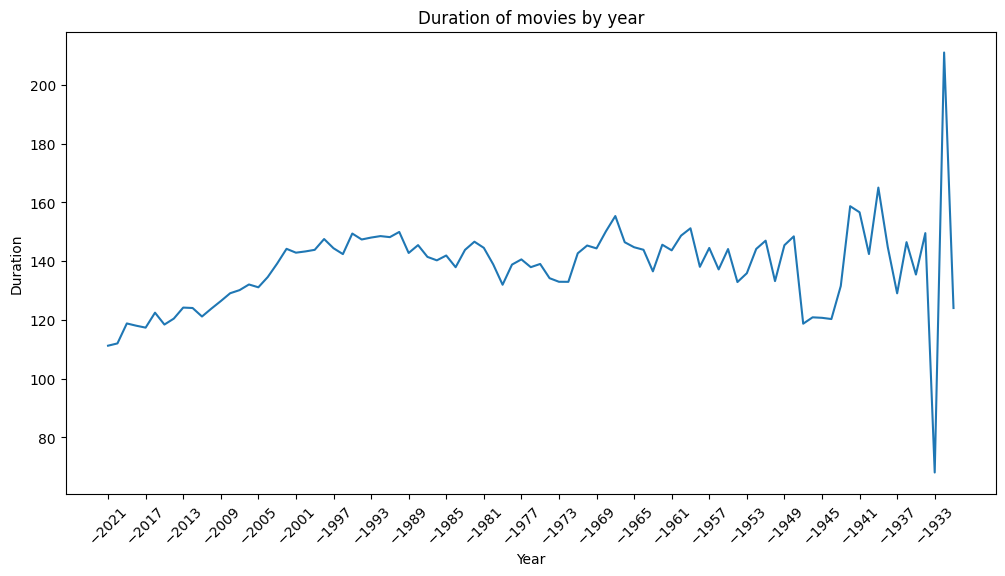

In [111]:
plt.figure(figsize=(12,6))
sns.lineplot(data=avg_duration,x="Year",y="Duration")
plt.xticks(avg_duration["Year"][::4],rotation=45)
plt.title("Duration of movies by year")
plt.show()

In [114]:
movie_rating["Genre"] = movie_rating["Genre"].str.split(",")

genre_data = movie_rating.explode("Genre")
genre_data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,#Yaaram,-2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Aur Pyaar Ho Gaya,-1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
15503,Zulm Ki Zanjeer,-1989,125,Drama,5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,-1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15505,Zulmi,-1999,129,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15508,Zulm-O-Sitam,-1998,130,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


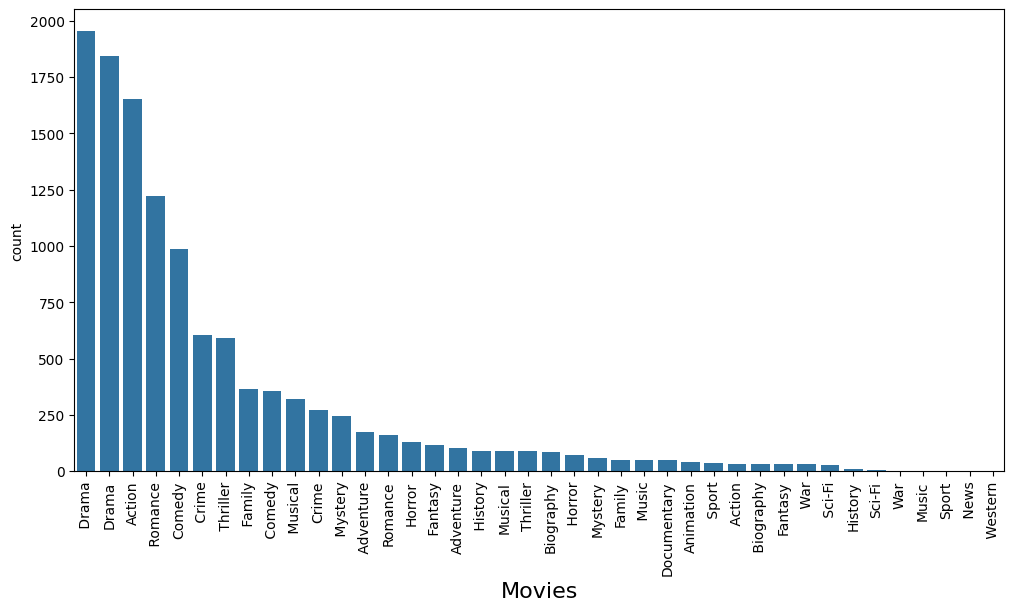

In [120]:
plt.figure(figsize=(12,6))
sns.countplot(data = genre_data, x = "Genre", order = genre_data["Genre"].value_counts().index)
plt.xlabel("Movies",fontsize=16)
plt.xticks(rotation=90)
plt.show()

In [122]:
avg_rating_by_genre = genre_data.groupby("Genre")["Rating"].mean().reset_index()
avg_rating_by_genre = avg_rating_by_genre.sort_values("Rating",ascending=False)

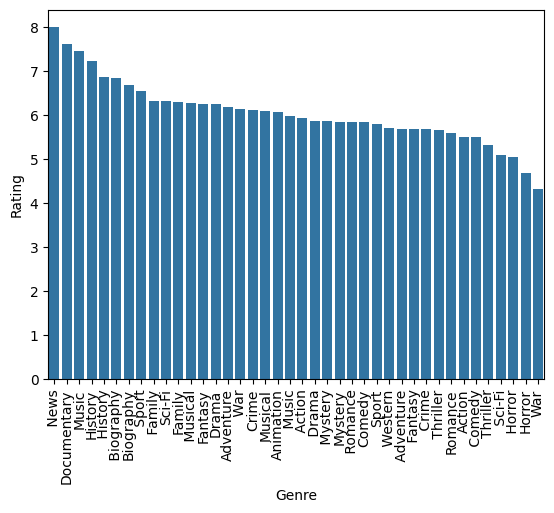

In [123]:
sns.barplot(data = avg_rating_by_genre, x = "Genre",y = "Rating")
plt.xticks(rotation=90)
plt.show()